In [1]:
import sys
sys.path.insert(0, '/das/work/p17/p17983/')

In [2]:
%matplotlib nbagg
import jungfrau_utils as ju
import numpy as np
import json
import os
import time
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import h5py

from alvra_tools.load_data import *
from alvra_tools.channels import *

[INFO][corrections] Numba not available, reverting to Numpy


In [3]:
scan_name = "Ru_foil_monoscan_001"
DIR = "/das/work/p17/p17983/cropped_data/scan_data/" + scan_name + "/"
DIRBS = "/sf/alvra/data/p17983/raw/scan_data/Ru_foil_monoscan_001/"

In [4]:
numstds = 2
minIzero = 0.002
image_threshold = 1.5
hot_pixel = 7.5

filename = "Ru_foil_monoscan_001_step0010"

images, _ = load_JF_cropped_data(DIR + filename + ".JF02T09V02crop.h5" , 2, nshots=None)

print(DIR + filename + ".JF02T09V02crop.h5")
print(DIRBS + filename + ".BSREAD.h5")

(_, _, IzeroFEL, _, _, _, Energy, _, _, _ )\
    = load_PumpProbe_events_withTwoVariables(DIRBS + filename + ".BSREAD.h5", channel_BS_pulse_ids, channel_energy)

total = 0

IzeroMedian = np.median(IzeroFEL)
IzeroSTD = np.std(IzeroFEL)

nframes = images.shape[0]

IzeroMedian = np.median(IzeroFEL)
IzeroSTD = np.std(IzeroFEL)

print('number of frames')
print(nframes)

images_good = images

images_thr = images_good.copy()
images_thr[images_good < image_threshold] = 0
images_thr[images_good > hot_pixel] = 0

conditionMax = IzeroFEL < IzeroMedian+numstds*IzeroSTD
conditionMin = IzeroFEL > IzeroMedian-numstds*IzeroSTD
conditionLow = IzeroFEL > minIzero
condition = np.logical_and.reduce((conditionLow, conditionMin, conditionMax)).T[0]

images_thr = images_thr[condition]

print('number of surviving frames')
print(images_thr.shape[0])

XES = images_thr.sum(axis=0)/images_thr.shape[0]

print("XES size")
print(XES.shape)


images_roi2
<KeysViewHDF5 ['coords_roi1', 'coords_roi2', 'coords_roi3', 'coords_roi4', 'images_roi1', 'images_roi2', 'images_roi3', 'images_roi4', 'pulse_ids']>
/das/work/p17/p17983/cropped_data/scan_data/Ru_foil_monoscan_001/Ru_foil_monoscan_001_step0010.JF02T09V02crop.h5
/sf/alvra/data/p17983/raw/scan_data/Ru_foil_monoscan_001/Ru_foil_monoscan_001_step0010.BSREAD.h5
number of frames
1000
number of surviving frames
489
XES size
(512, 300)


<IPython.core.display.Javascript object>


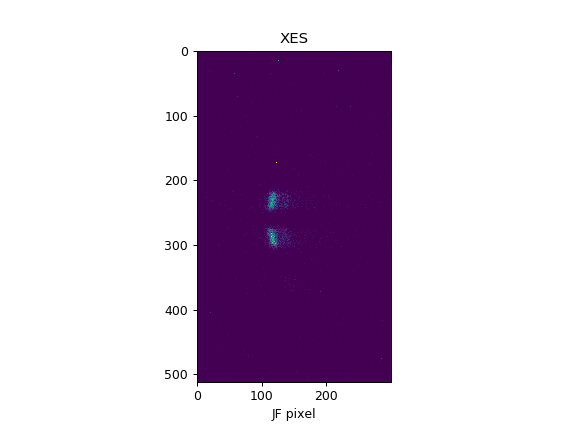

Text(0.5, 1.0, 'XES')

In [5]:
plt.figure()
plt.imshow(XES, vmax = 0.1, vmin = 0)
plt.xlabel('JF pixel')
plt.title('XES')

<IPython.core.display.Javascript object>


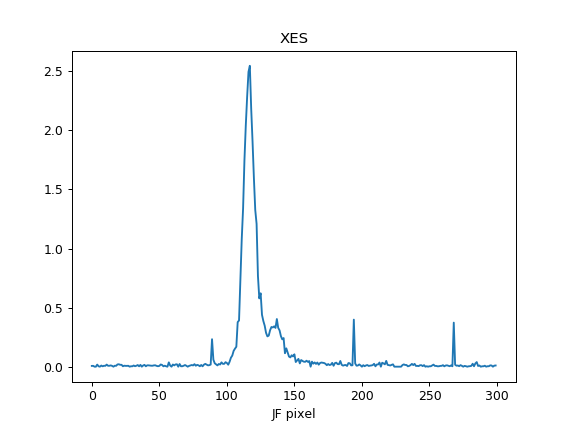

Text(0.5, 1.0, 'XES')

In [6]:
plt.figure()
plt.plot(XES.sum(axis=0))
plt.xlabel('JF pixel')
plt.title('XES')